# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [21]:
! pip install Pillow

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [23]:
! git clone https://github.com/vcasadei/MNIST.git

fatal: destination path 'MNIST' already exists and is not an empty directory.


In [24]:
!ls MNIST

processed  raw


In [25]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [26]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

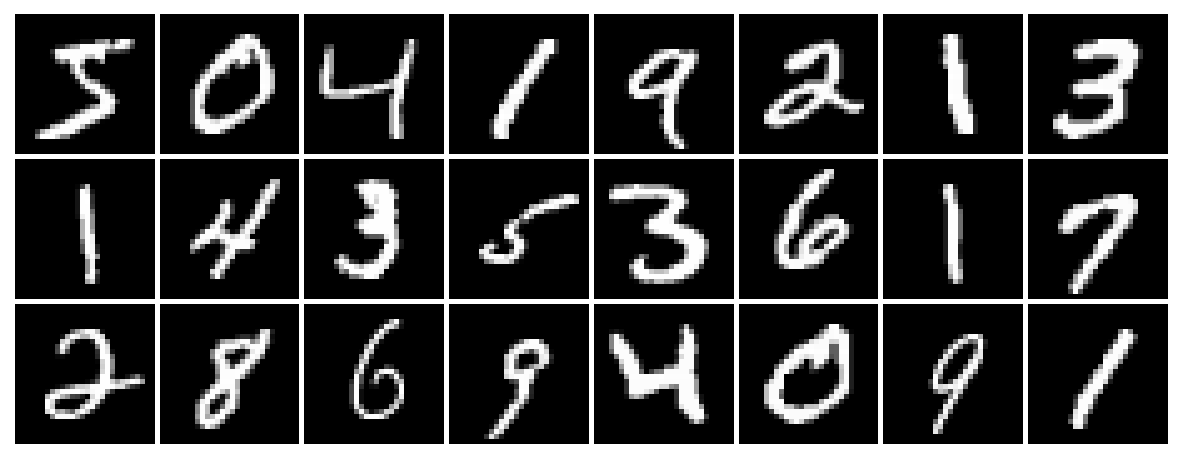

In [27]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


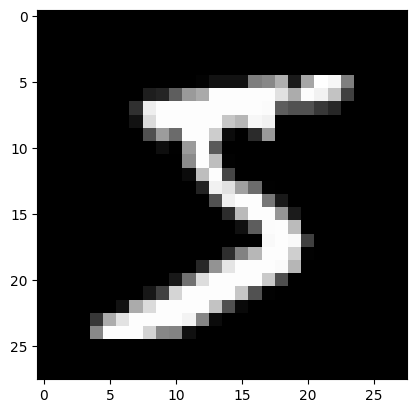

In [28]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [29]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [30]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[ 0.0140, -0.1805,  0.0798, -0.1110,  0.1400,  0.1519, -0.1723,  0.0202,
          0.2546,  0.3278],
        [-0.0364, -0.0735,  0.2644, -0.3698,  0.0978,  0.0388, -0.2245, -0.2893,
          0.5297, -0.0197],
        [-0.0138,  0.0712,  0.1756, -0.1373,  0.2827, -0.0736, -0.3797,  0.1330,
          0.0682, -0.3539],
        [-0.1987,  0.2196,  0.1209, -0.1231,  0.0054, -0.0039,  0.0206, -0.0358,
          0.1841, -0.0403],
        [-0.0939,  0.0680,  0.3018,  0.1323, -0.1383, -0.2061, -0.0590, -0.1668,
          0.1354,  0.0675]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [31]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [32]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-oeyfvw8r
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-oeyfvw8r
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done


In [33]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3156, grad_fn=<NllLossBackward0>)

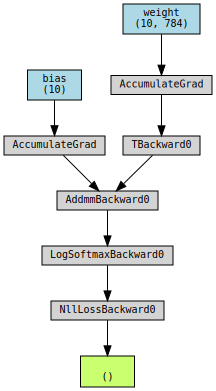

In [34]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

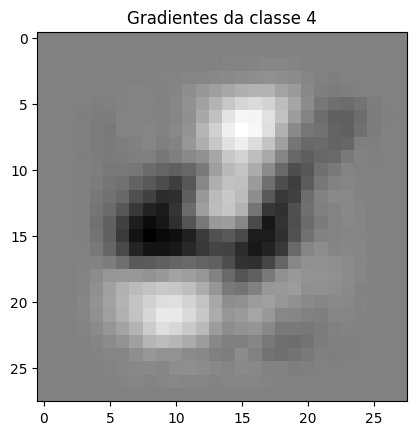

Epoch[1/100], loss: 2.315599, acc: 0.102000


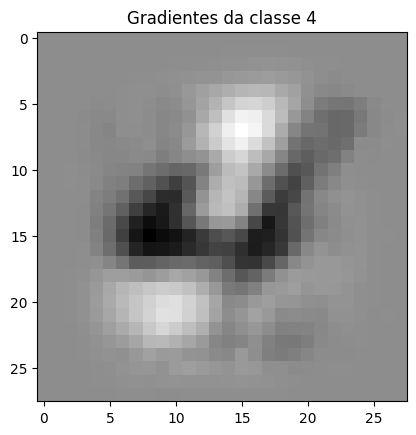

Epoch[2/100], loss: 1.811839, acc: 0.563000


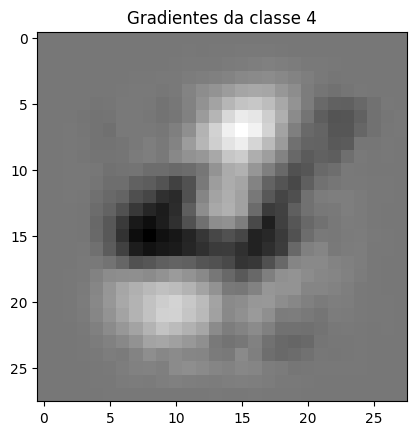

Epoch[3/100], loss: 1.473407, acc: 0.761000


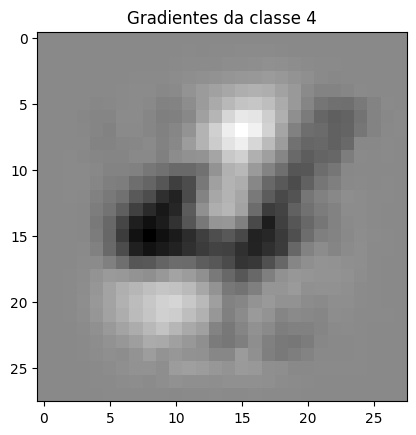

Epoch[4/100], loss: 1.253026, acc: 0.745000


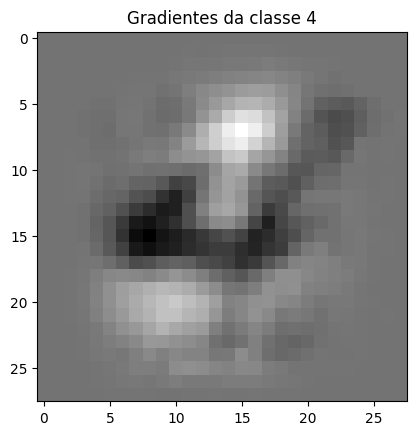

Epoch[5/100], loss: 1.101419, acc: 0.810000


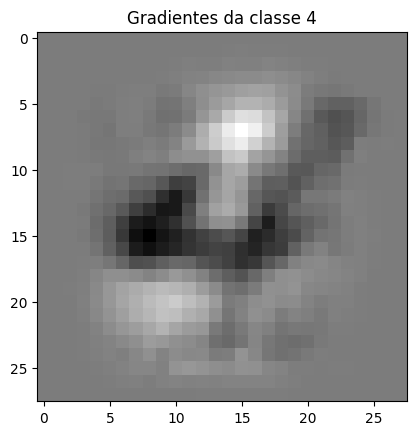

Epoch[6/100], loss: 0.991671, acc: 0.808000


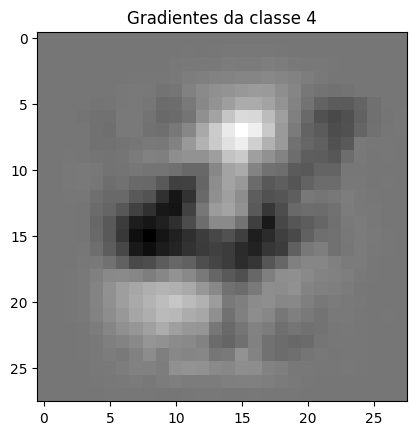

Epoch[7/100], loss: 0.910058, acc: 0.833000


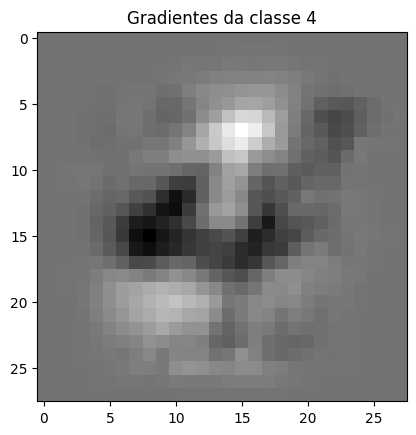

Epoch[8/100], loss: 0.847169, acc: 0.832000


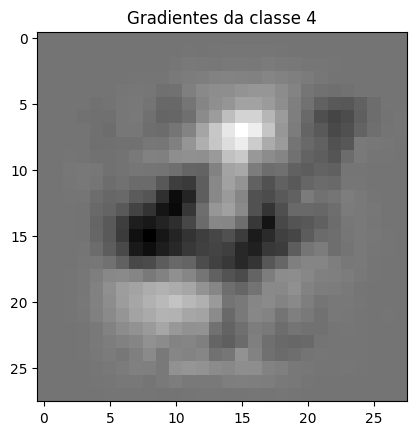

Epoch[9/100], loss: 0.796881, acc: 0.844000


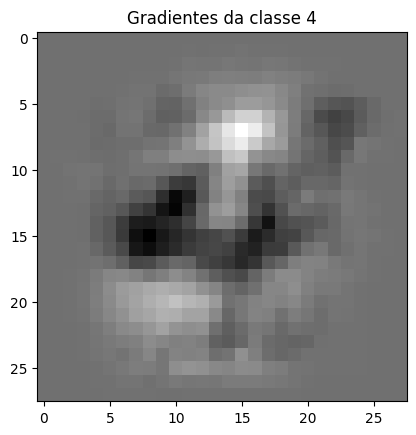

Epoch[10/100], loss: 0.755500, acc: 0.846000


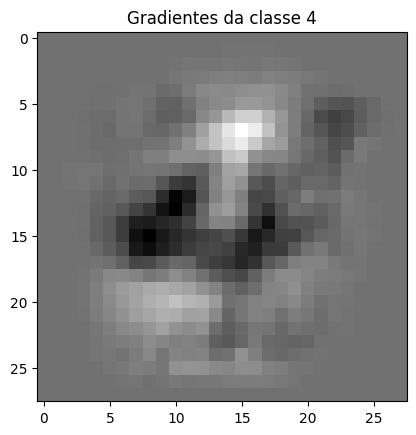

Epoch[11/100], loss: 0.720664, acc: 0.860000


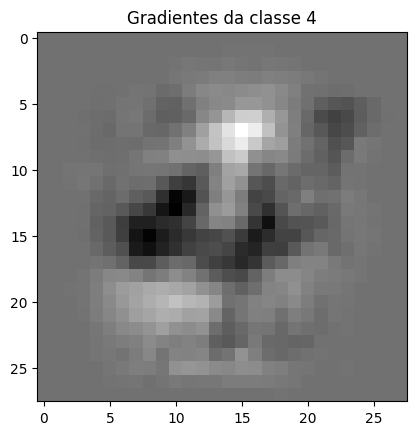

Epoch[12/100], loss: 0.690813, acc: 0.861000


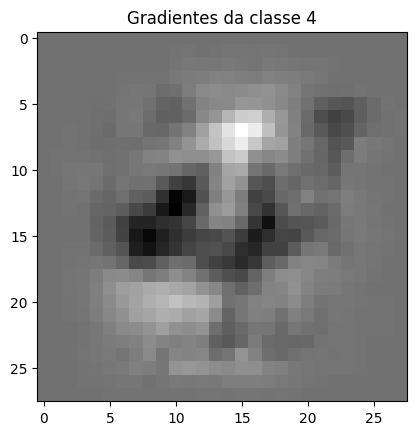

Epoch[13/100], loss: 0.664860, acc: 0.867000


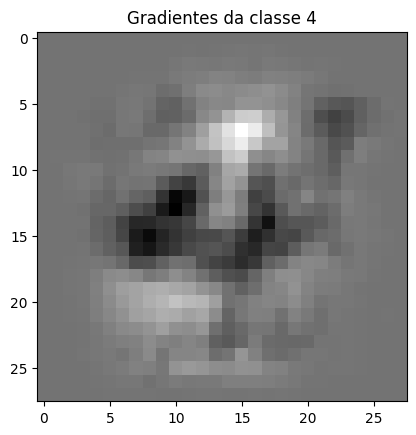

Epoch[14/100], loss: 0.642020, acc: 0.870000


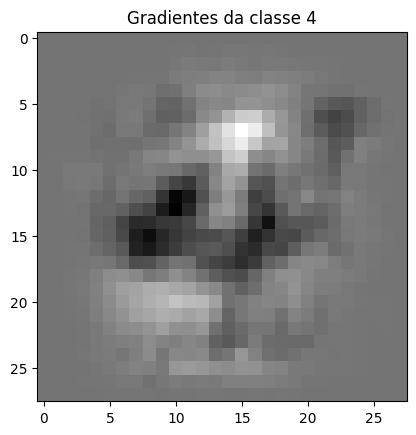

Epoch[15/100], loss: 0.621713, acc: 0.873000


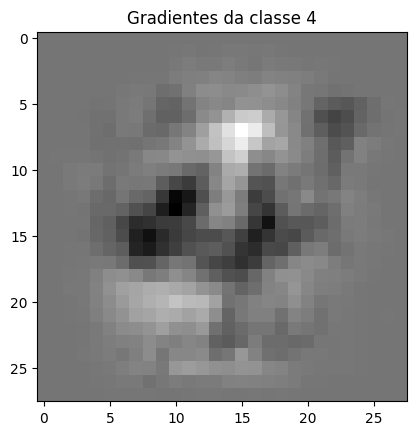

Epoch[16/100], loss: 0.603495, acc: 0.877000


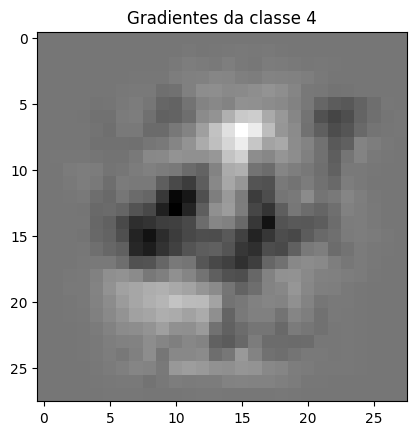

Epoch[17/100], loss: 0.587027, acc: 0.877000


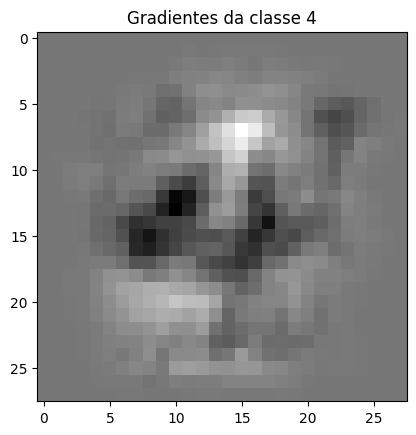

Epoch[18/100], loss: 0.572038, acc: 0.877000


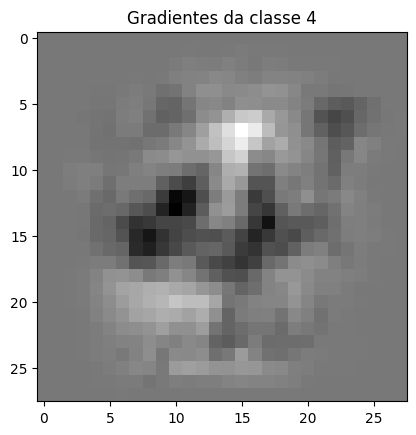

Epoch[19/100], loss: 0.558314, acc: 0.878000


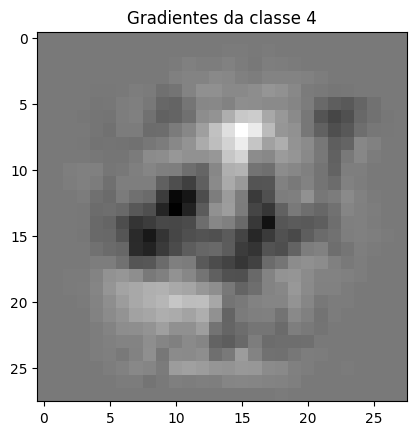

Epoch[20/100], loss: 0.545682, acc: 0.879000


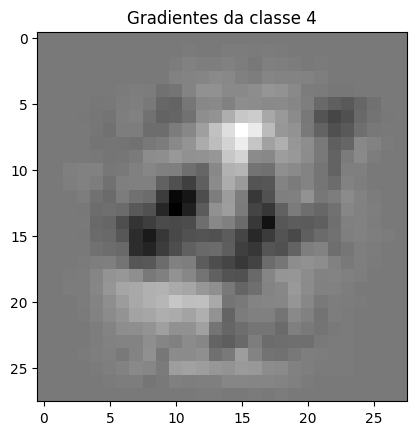

Epoch[21/100], loss: 0.534000, acc: 0.884000


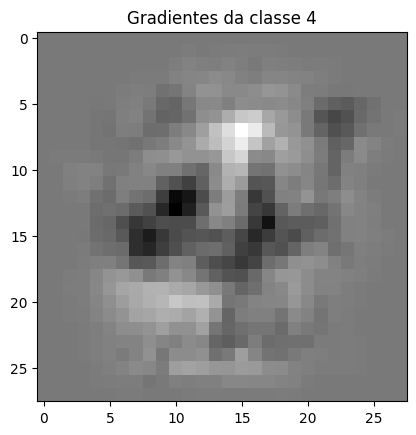

Epoch[22/100], loss: 0.523149, acc: 0.884000


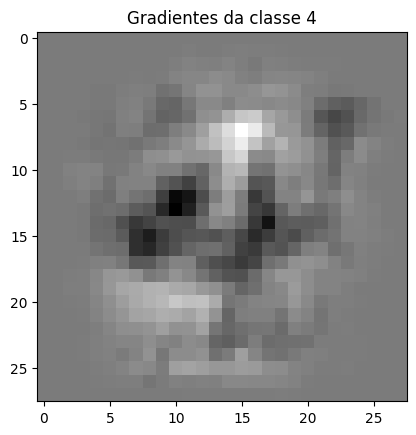

Epoch[23/100], loss: 0.513032, acc: 0.886000


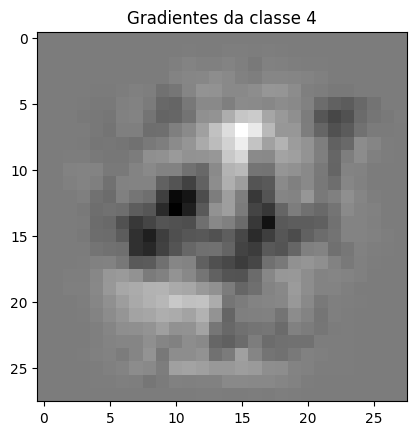

Epoch[24/100], loss: 0.503565, acc: 0.887000


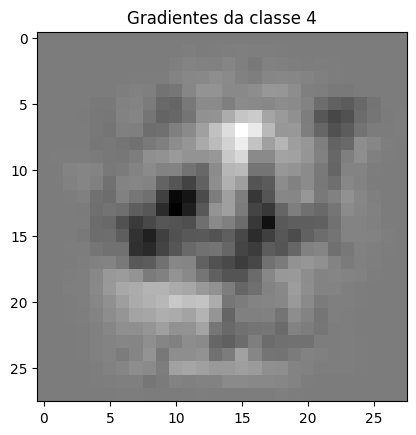

Epoch[25/100], loss: 0.494679, acc: 0.887000


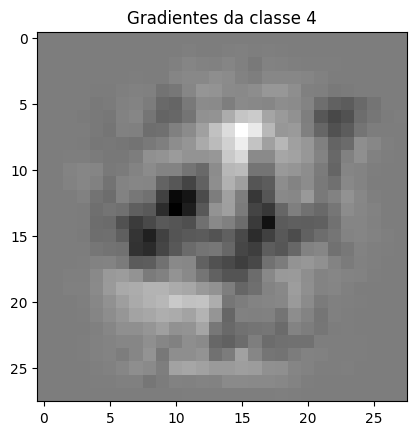

Epoch[26/100], loss: 0.486313, acc: 0.891000


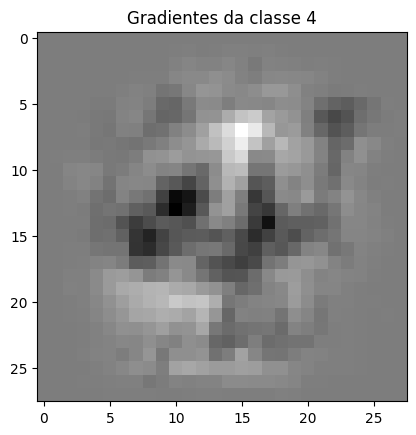

Epoch[27/100], loss: 0.478416, acc: 0.891000


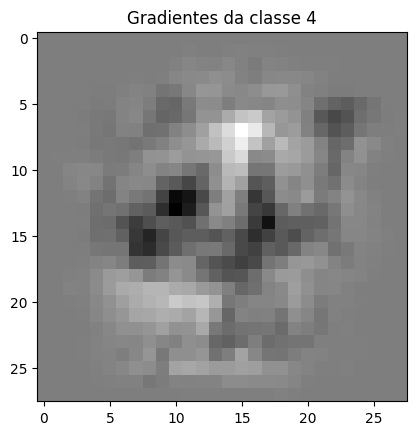

Epoch[28/100], loss: 0.470942, acc: 0.894000


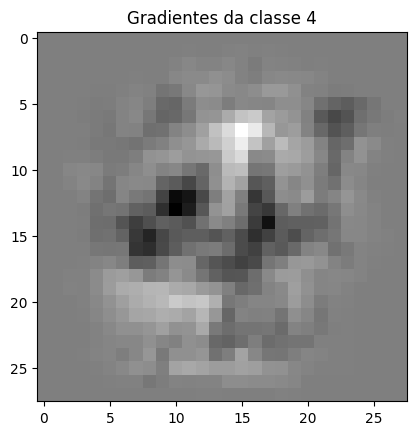

Epoch[29/100], loss: 0.463854, acc: 0.897000


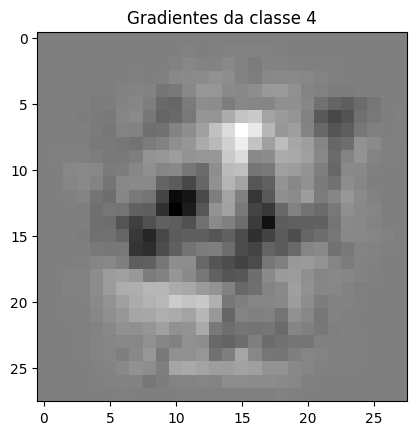

Epoch[30/100], loss: 0.457116, acc: 0.899000


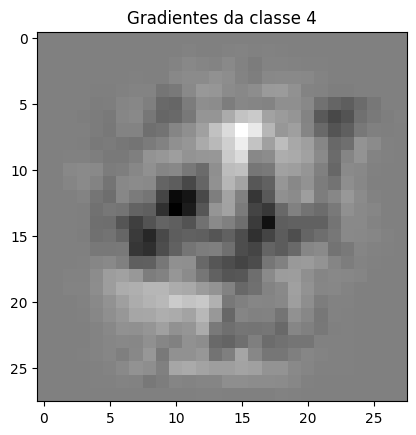

Epoch[31/100], loss: 0.450700, acc: 0.900000


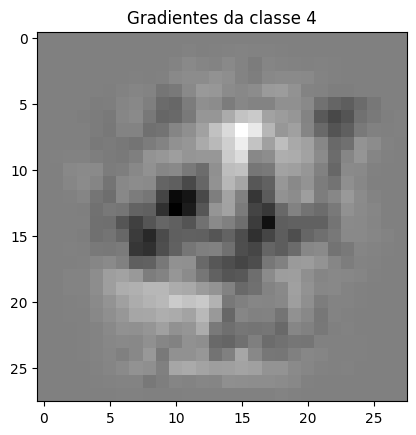

Epoch[32/100], loss: 0.444577, acc: 0.900000


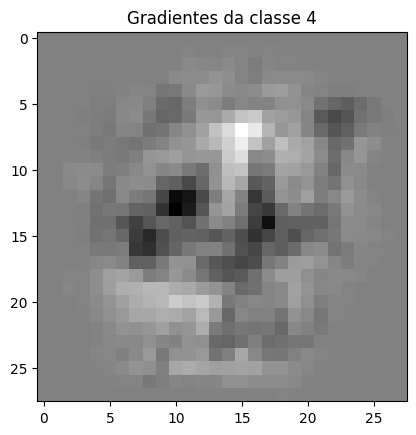

Epoch[33/100], loss: 0.438725, acc: 0.900000


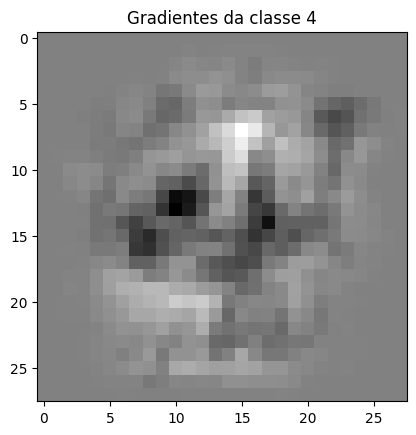

Epoch[34/100], loss: 0.433123, acc: 0.904000


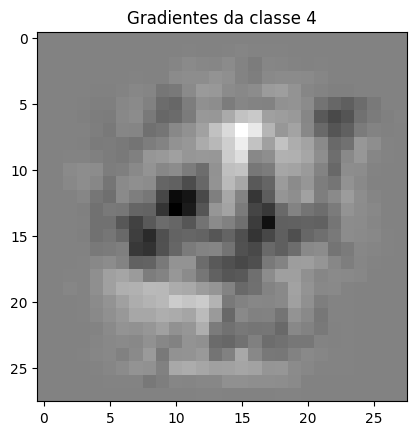

Epoch[35/100], loss: 0.427752, acc: 0.905000


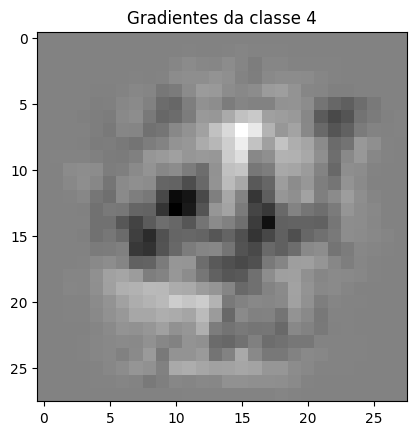

Epoch[36/100], loss: 0.422595, acc: 0.907000


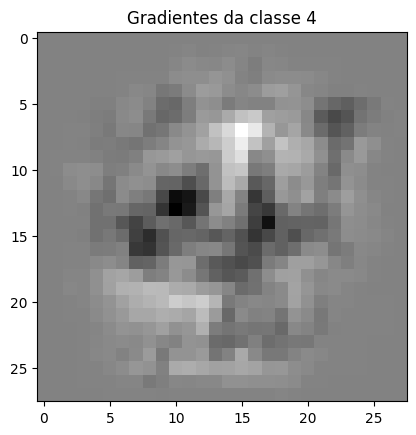

Epoch[37/100], loss: 0.417638, acc: 0.908000


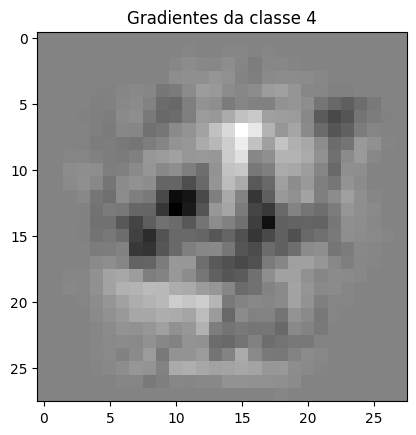

Epoch[38/100], loss: 0.412865, acc: 0.909000


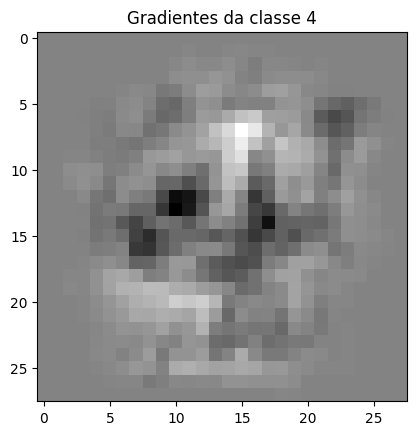

Epoch[39/100], loss: 0.408266, acc: 0.909000


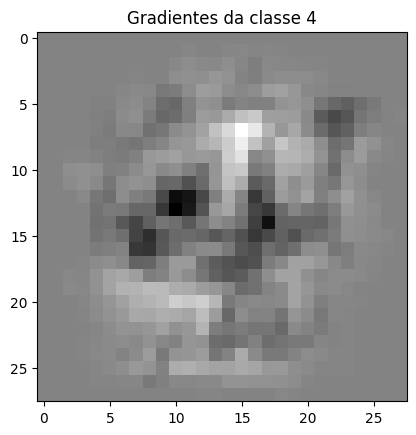

Epoch[40/100], loss: 0.403829, acc: 0.911000


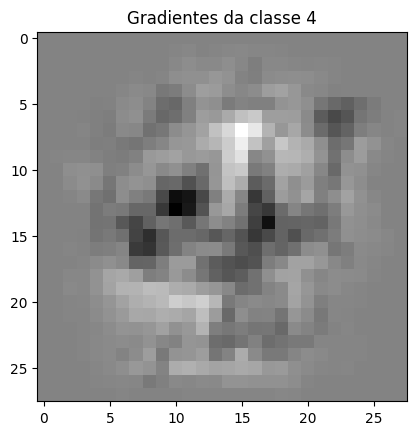

Epoch[41/100], loss: 0.399543, acc: 0.912000


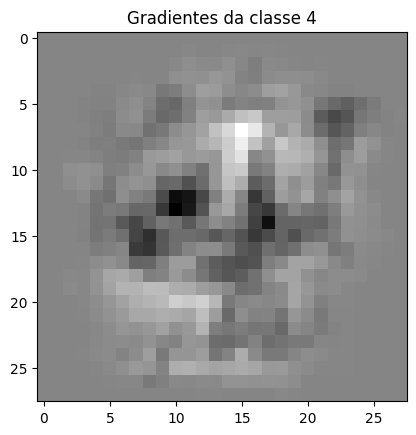

Epoch[42/100], loss: 0.395400, acc: 0.913000


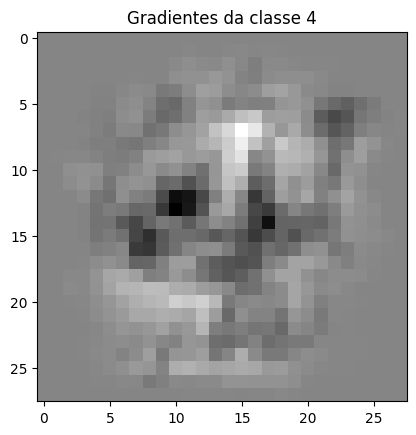

Epoch[43/100], loss: 0.391390, acc: 0.914000


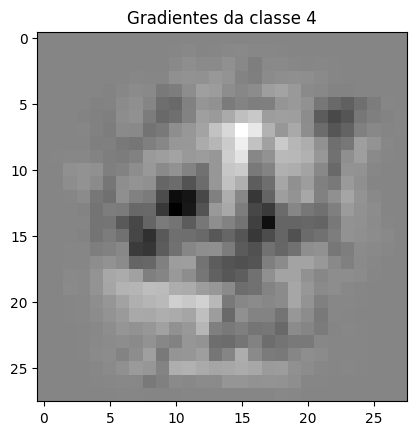

Epoch[44/100], loss: 0.387506, acc: 0.914000


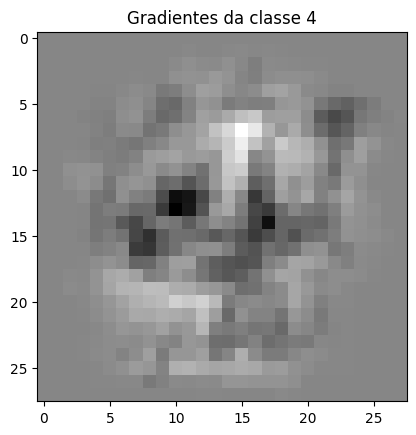

Epoch[45/100], loss: 0.383741, acc: 0.915000


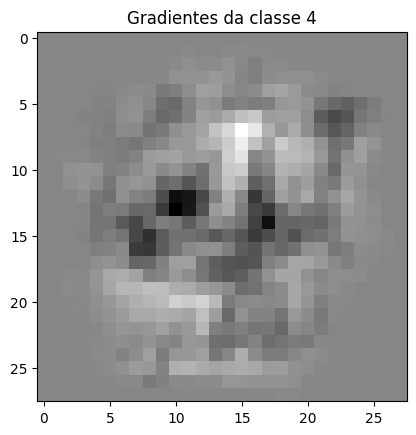

Epoch[46/100], loss: 0.380089, acc: 0.916000


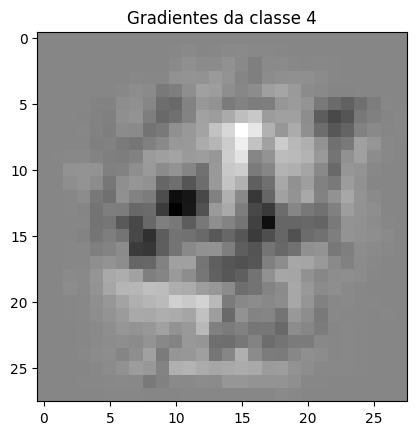

Epoch[47/100], loss: 0.376542, acc: 0.916000


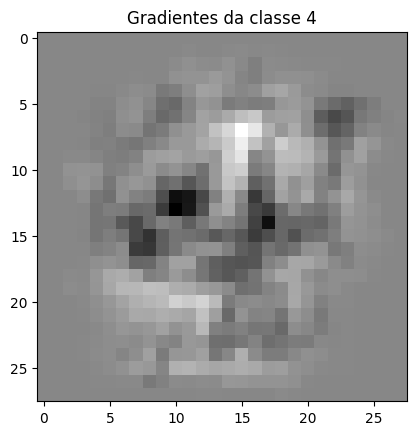

Epoch[48/100], loss: 0.373096, acc: 0.916000


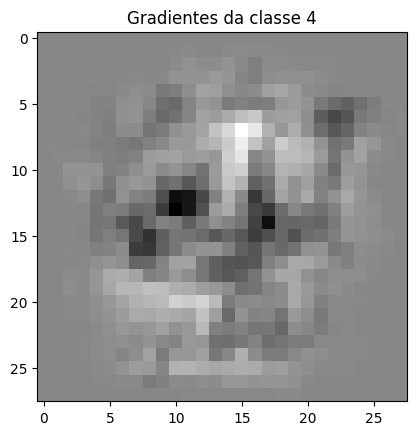

Epoch[49/100], loss: 0.369745, acc: 0.918000


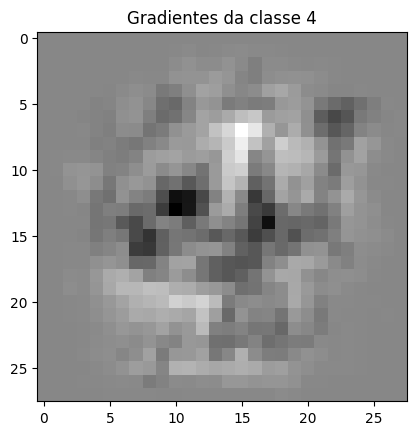

Epoch[50/100], loss: 0.366484, acc: 0.918000


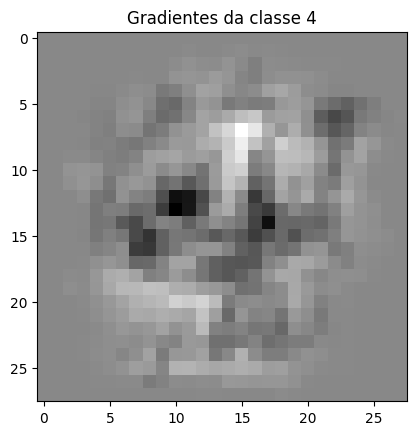

Epoch[51/100], loss: 0.363309, acc: 0.918000


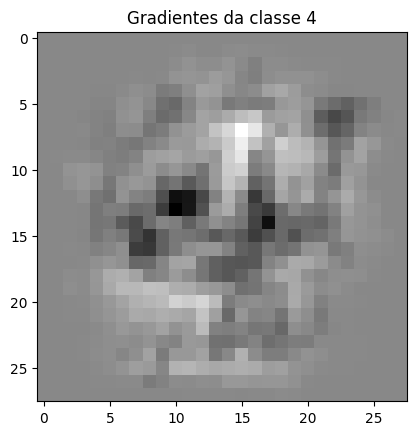

Epoch[52/100], loss: 0.360216, acc: 0.918000


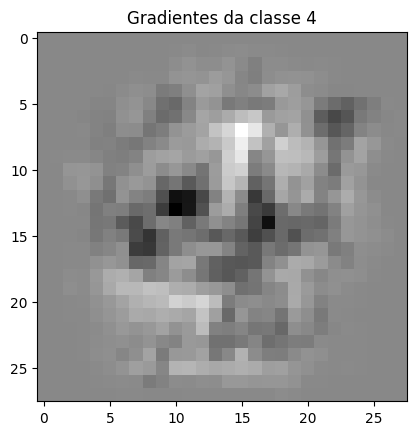

Epoch[53/100], loss: 0.357201, acc: 0.919000


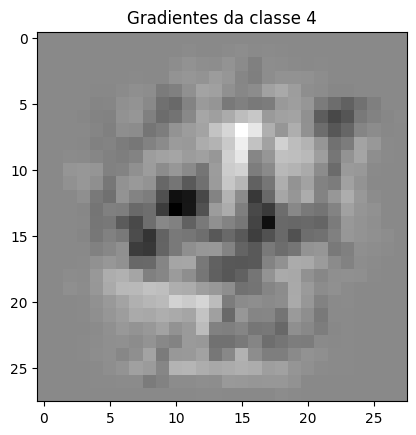

Epoch[54/100], loss: 0.354260, acc: 0.919000


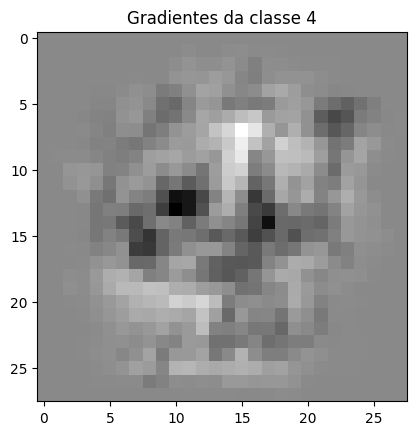

Epoch[55/100], loss: 0.351390, acc: 0.919000


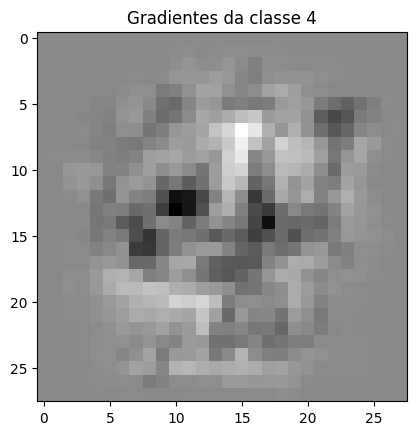

Epoch[56/100], loss: 0.348587, acc: 0.919000


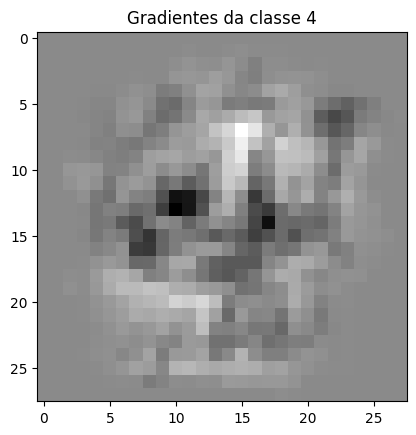

Epoch[57/100], loss: 0.345849, acc: 0.920000


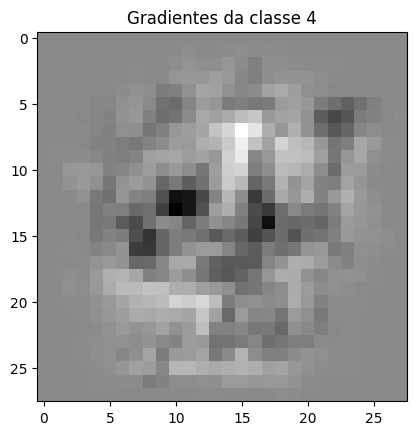

Epoch[58/100], loss: 0.343174, acc: 0.920000


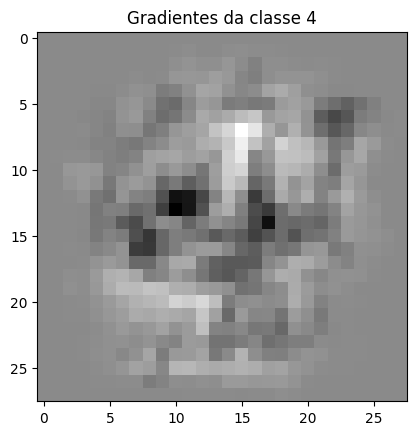

Epoch[59/100], loss: 0.340557, acc: 0.920000


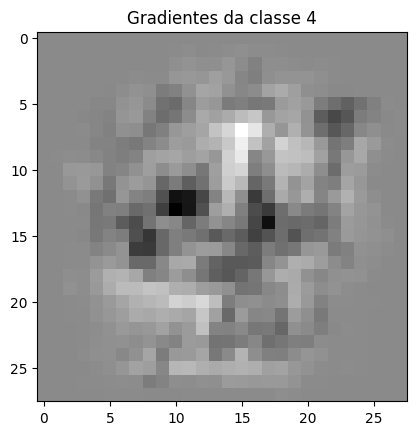

Epoch[60/100], loss: 0.337997, acc: 0.922000


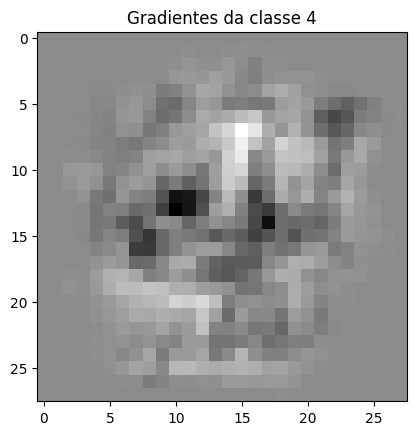

Epoch[61/100], loss: 0.335492, acc: 0.922000


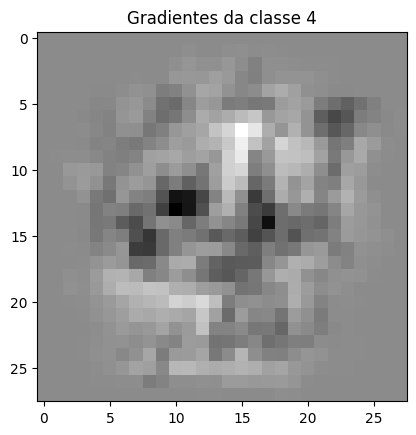

Epoch[62/100], loss: 0.333039, acc: 0.922000


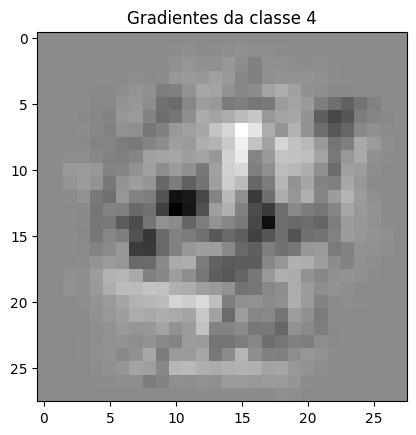

Epoch[63/100], loss: 0.330636, acc: 0.922000


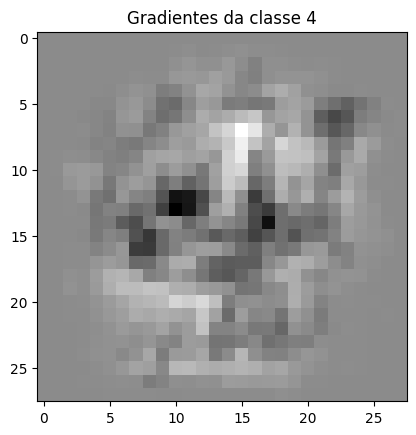

Epoch[64/100], loss: 0.328282, acc: 0.923000


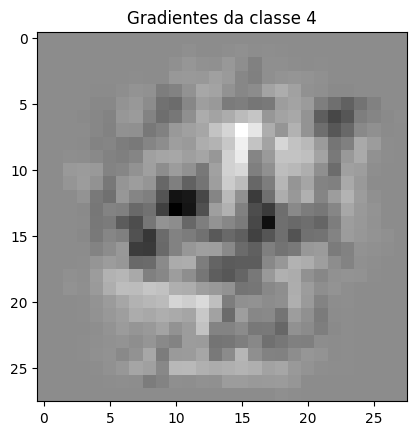

Epoch[65/100], loss: 0.325974, acc: 0.923000


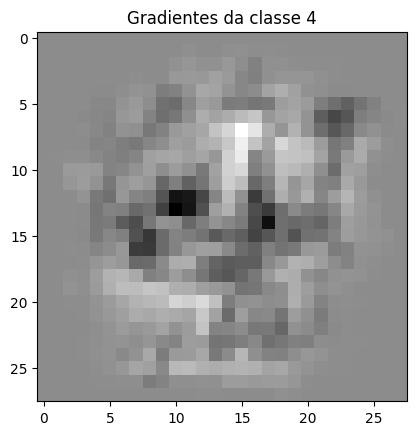

Epoch[66/100], loss: 0.323711, acc: 0.925000


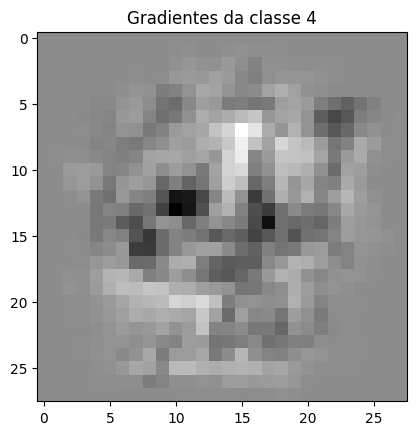

Epoch[67/100], loss: 0.321491, acc: 0.926000


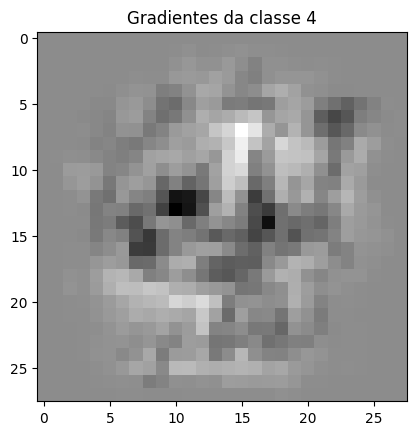

Epoch[68/100], loss: 0.319313, acc: 0.927000


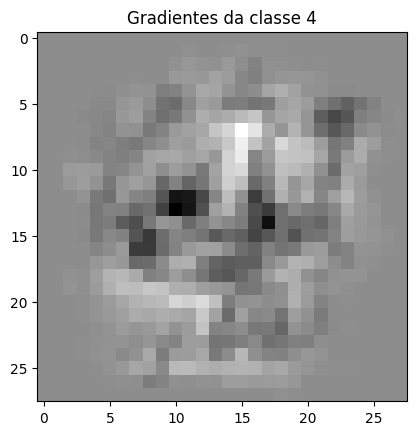

Epoch[69/100], loss: 0.317175, acc: 0.928000


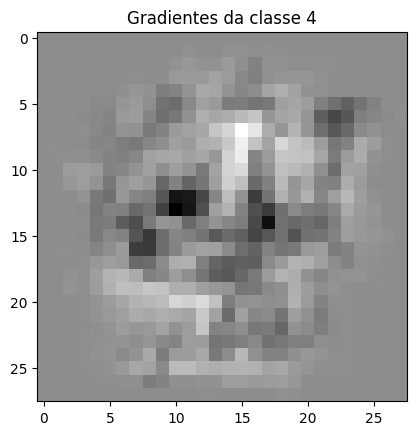

Epoch[70/100], loss: 0.315076, acc: 0.927000


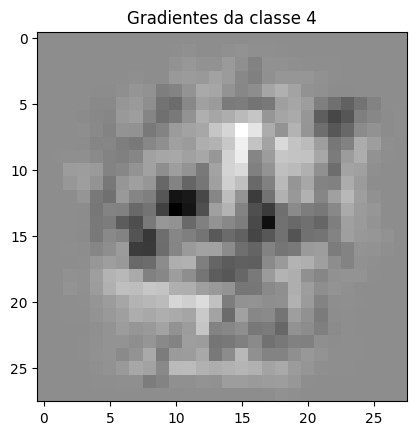

Epoch[71/100], loss: 0.313014, acc: 0.927000


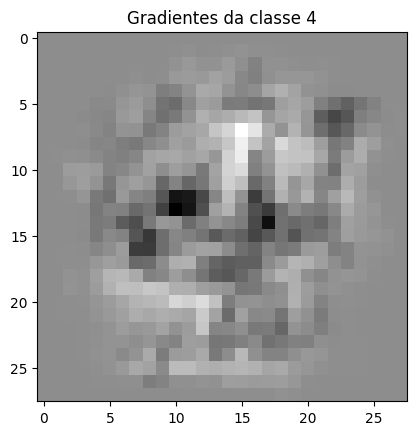

Epoch[72/100], loss: 0.310989, acc: 0.927000


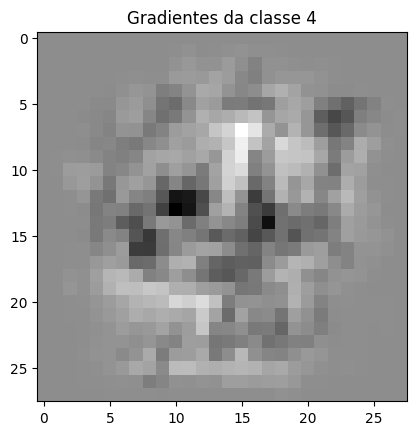

Epoch[73/100], loss: 0.308998, acc: 0.927000


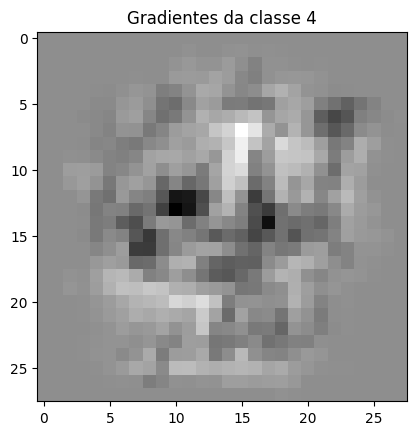

Epoch[74/100], loss: 0.307041, acc: 0.927000


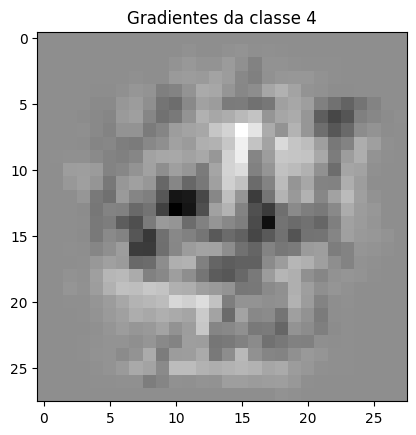

Epoch[75/100], loss: 0.305117, acc: 0.927000


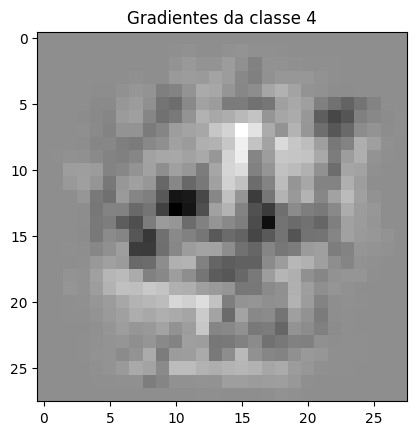

Epoch[76/100], loss: 0.303225, acc: 0.929000


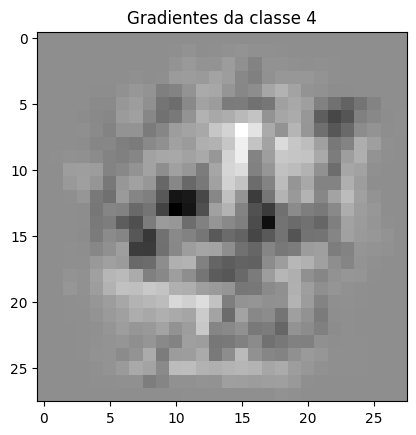

Epoch[77/100], loss: 0.301363, acc: 0.930000


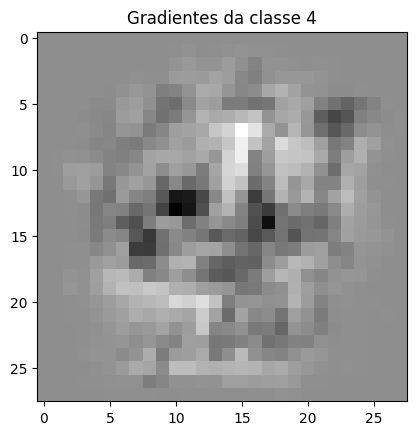

Epoch[78/100], loss: 0.299531, acc: 0.930000


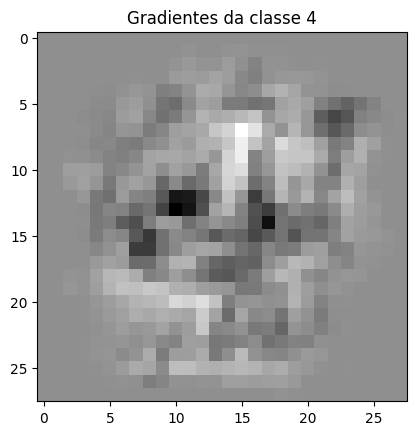

Epoch[79/100], loss: 0.297728, acc: 0.930000


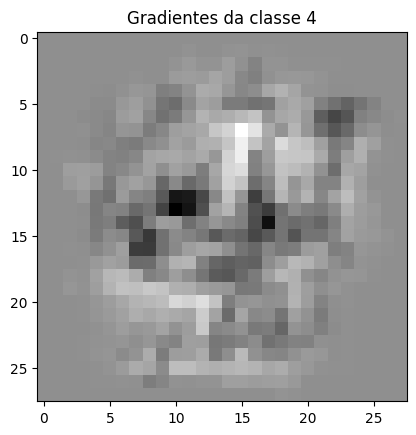

Epoch[80/100], loss: 0.295954, acc: 0.930000


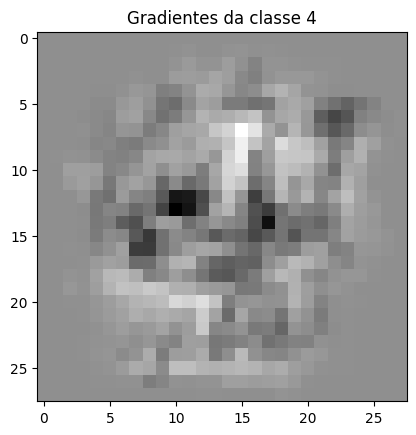

Epoch[81/100], loss: 0.294206, acc: 0.932000


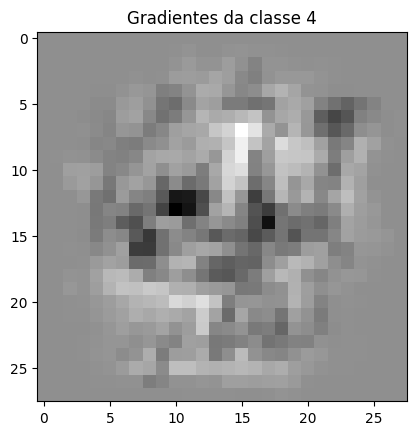

Epoch[82/100], loss: 0.292485, acc: 0.933000


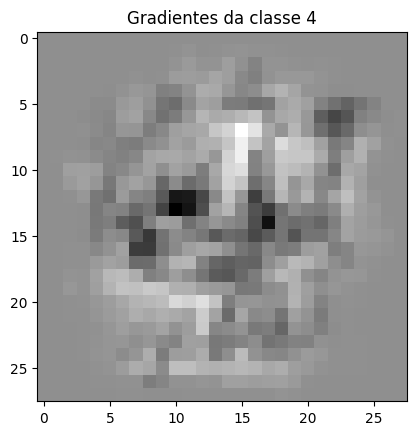

Epoch[83/100], loss: 0.290789, acc: 0.933000


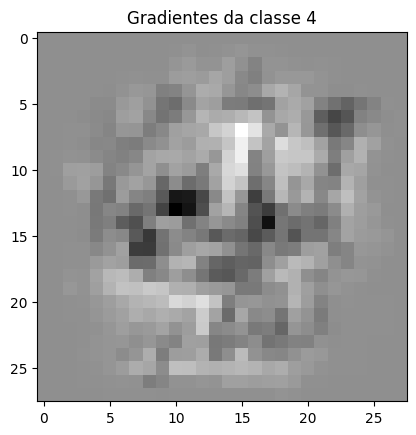

Epoch[84/100], loss: 0.289118, acc: 0.933000


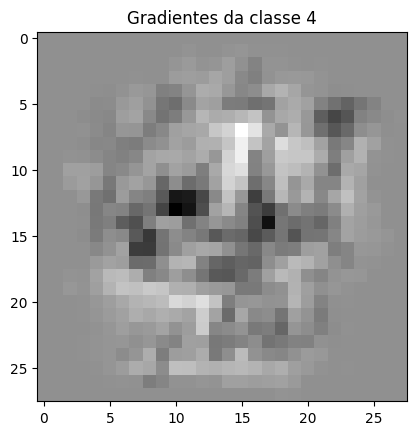

Epoch[85/100], loss: 0.287472, acc: 0.934000


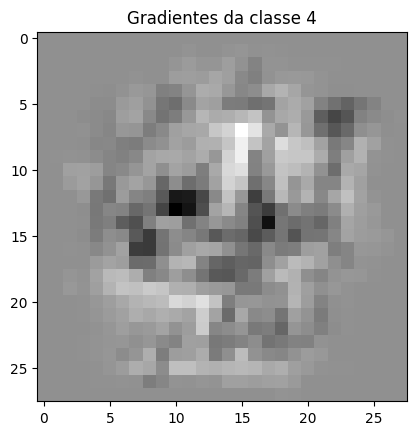

Epoch[86/100], loss: 0.285849, acc: 0.935000


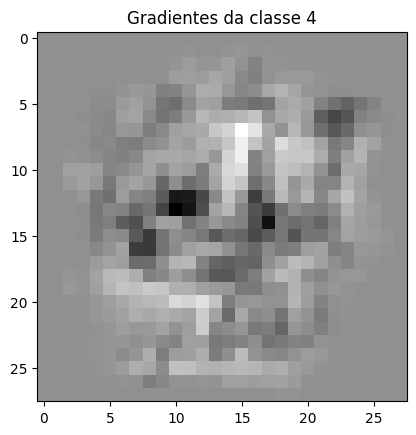

Epoch[87/100], loss: 0.284249, acc: 0.936000


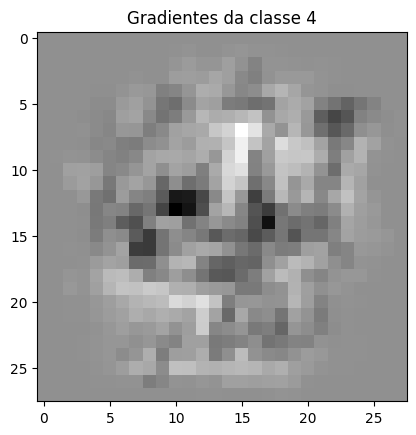

Epoch[88/100], loss: 0.282672, acc: 0.936000


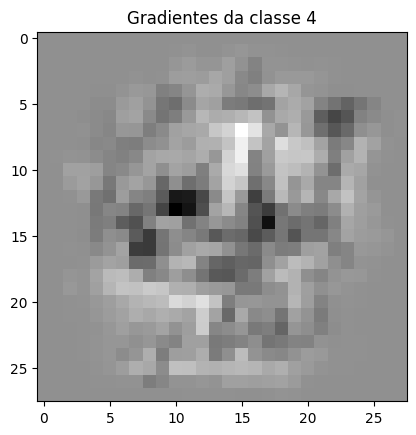

Epoch[89/100], loss: 0.281116, acc: 0.936000


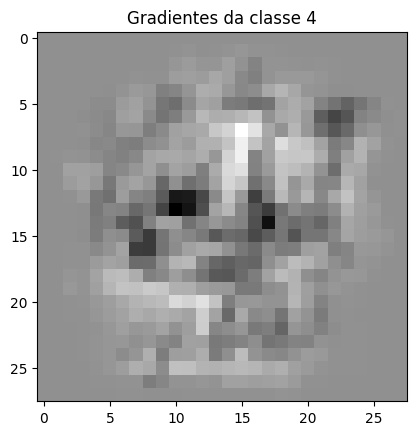

Epoch[90/100], loss: 0.279581, acc: 0.937000


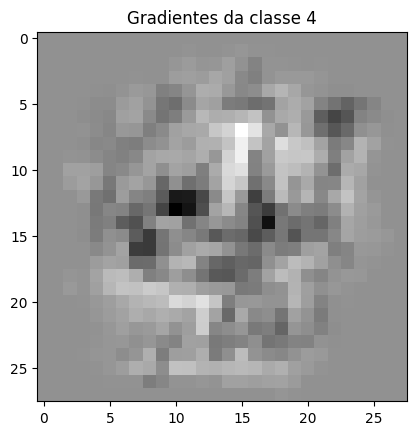

Epoch[91/100], loss: 0.278067, acc: 0.937000


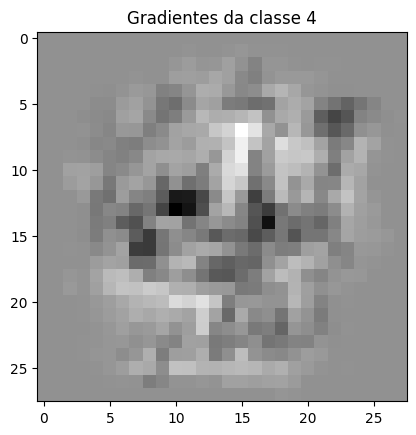

Epoch[92/100], loss: 0.276574, acc: 0.937000


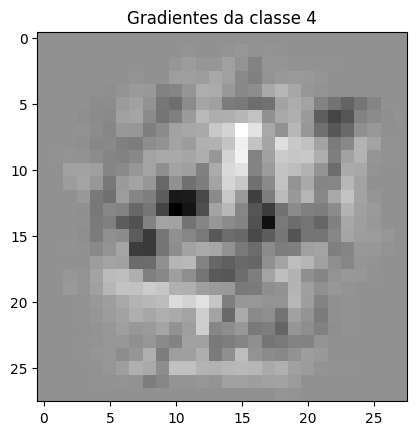

Epoch[93/100], loss: 0.275100, acc: 0.938000


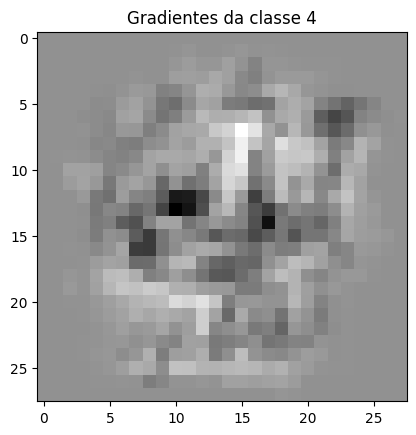

Epoch[94/100], loss: 0.273644, acc: 0.938000


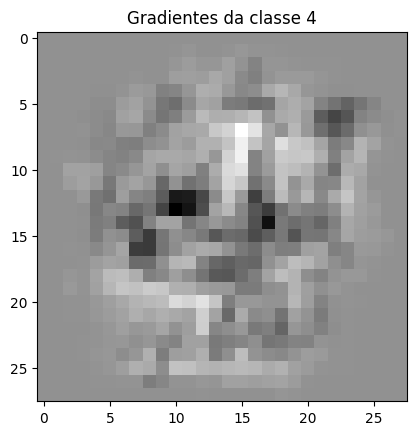

Epoch[95/100], loss: 0.272208, acc: 0.939000


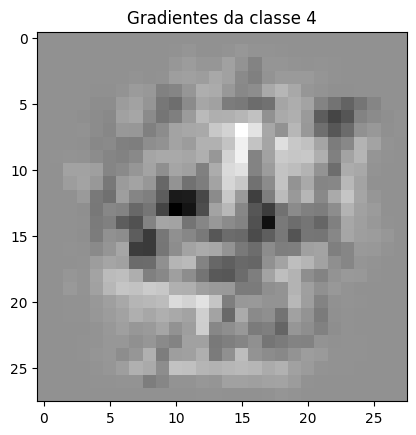

Epoch[96/100], loss: 0.270790, acc: 0.939000


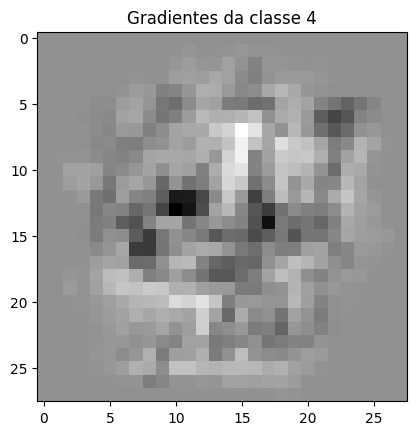

Epoch[97/100], loss: 0.269390, acc: 0.940000


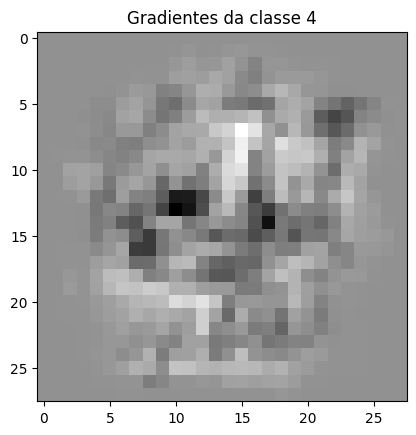

Epoch[98/100], loss: 0.268007, acc: 0.940000


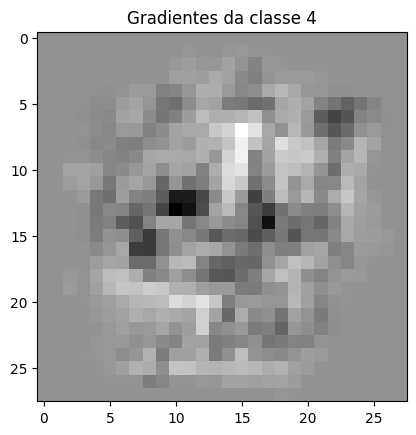

Epoch[99/100], loss: 0.266641, acc: 0.940000


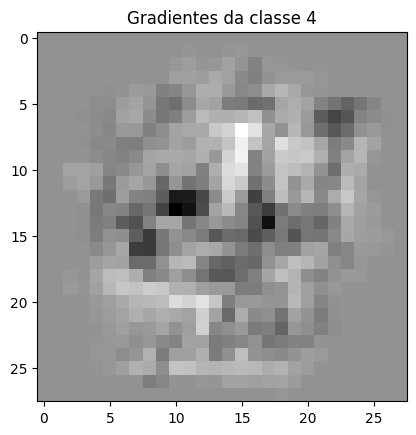

Epoch[100/100], loss: 0.265291, acc: 0.940000


In [35]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()

    gradientes = model.weight.grad[4].detach().numpy()  # gradientes da classe 4
    plt.imshow(gradientes.reshape(28, 28), cmap='gray')
    plt.title('Gradientes da classe 4')
    plt.show()

    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'.format(i+1, epochs, loss.item(), accuracy))




In [36]:
print('Final loss:', loss.item())

Final loss: 0.2652912735939026


### Visualizando gráfico de perda durante o treinamento

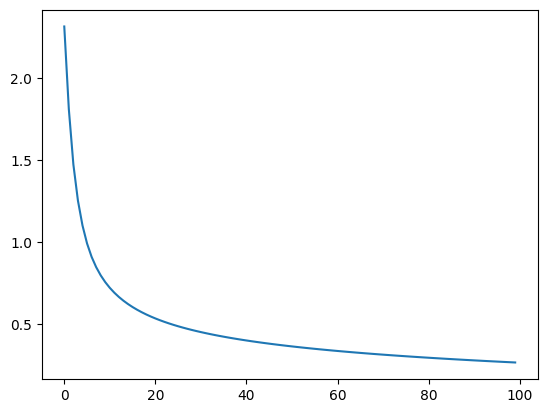

In [37]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [38]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.94


### Matriz de confusão com dados de treinamento e teste

In [39]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,97,0,1,0,0,0,1,0,0,2
1,0,110,2,0,0,0,1,3,1,0
2,0,1,90,1,0,1,1,1,2,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,2,0,2,0,3
5,0,2,0,1,0,82,0,0,2,1
6,0,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,110,0,3
8,0,2,2,0,0,1,1,0,81,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


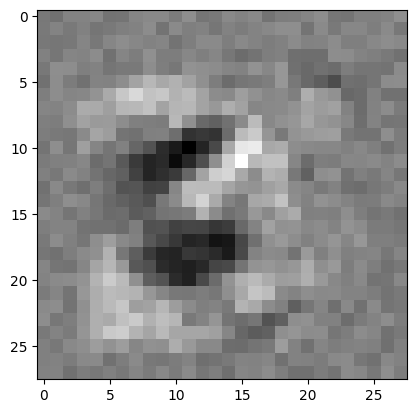

In [40]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

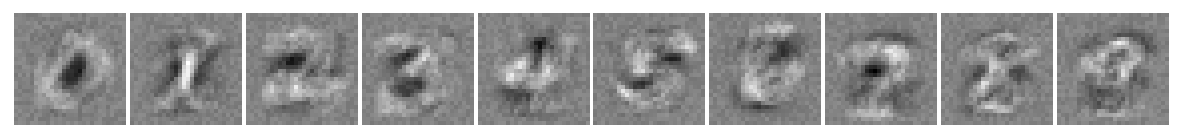

In [41]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
2. Qual é o shape da saída da rede?
3. Qual é o número total de parâmetros da rede, incluindo o bias?

# Aprendizados
